In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ananyashreesinha","key":"53d8f39cd10c786921be5785bfc3d0ab"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 72 Jun  1 17:52 kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

 61% 25.0M/41.0M [00:00<00:00, 53.7MB/s]
100% 41.0M/41.0M [00:00<00:00, 72.9MB/s]


In [ ]:
!ls

fake-and-real-news-dataset.zip	gdrive	kaggle.json  sample_data


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [ ]:
import pandas as pd

In [ ]:
true = pd.read_csv('True.csv')

In [ ]:
true.head(9)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"


In [ ]:
fake = pd.read_csv('Fake.csv')
fake.shape
fake.head(9)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"


In [ ]:
true['label'] = 1
fake['label'] = 0

In [ ]:
frames = [true.loc[:8000][:], fake.loc[:9000][:]]

In [ ]:
df = pd.concat(frames)

In [ ]:
df.shape

(17002, 5)

In [ ]:
df.tail()

,title,text,subject,date,label
8996,CNN Analyst: White Militia Are Not A Threat B...,People have been quick to point out that there...,News,"January 3, 2016",0
8997,Texas Lt. Governor Uses Fake Statistics To De...,"The Lieutenant Governor of Texas, Dan Patrick,...",News,"January 3, 2016",0
8998,Chris Christie Calls Obama A ‘Petulant Child’...,President Barack Obama has recently announced ...,News,"January 3, 2016",0
8999,Bernie Sanders Calls Out Trump Over His Obses...,"During a segment on ABC s This Week, Bernie Sa...",News,"January 3, 2016",0
9000,Teen Records Himself Abusing Girl: ‘This Is W...,A young man recorded himself as he maliciously...,News,"January 3, 2016",0


In [ ]:
X = df.drop('label', axis=1)
y = df['label']
# Delete missing data
df = df.dropna()
df2 = df.copy()
df2.reset_index(inplace=True)
df2.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df2['title'][2]

"Senior U.S. Republican senator: 'Let Mr. Mueller do his job'"

In [ ]:
#data preprocessing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import numpy as np
import itertools
classifier = PassiveAggressiveClassifier(max_iter=1000)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % accuracy)
f1 = metrics.f1_score(y_test, pred, average='weighted')
precision = metrics.precision_score(y_test, pred, average='weighted')
print("F1-Score: %.3f" % f1)
print("Precision: %.3f" % precision)



accuracy:   0.999
F1-Score: 0.999
Precision: 0.999


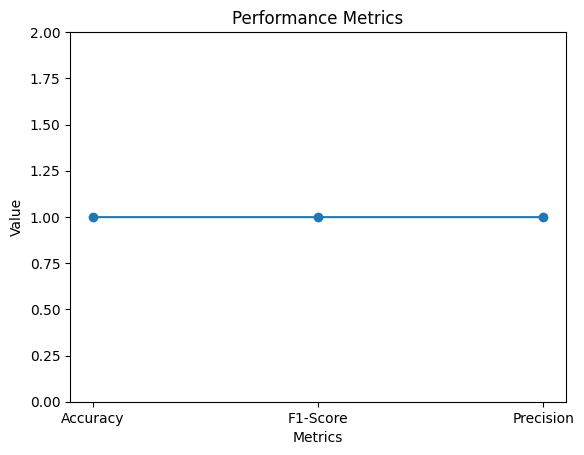

In [ ]:
# a line graph for accuracy,f1 score,prediction
import matplotlib.pyplot as plt

x_values = ['Accuracy', 'F1-Score', 'Precision']
y_values = [accuracy, f1, precision]

plt.plot(x_values, y_values, marker='o')
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.ylim([0, 2])
plt.show()

Confusion matrix, without normalization


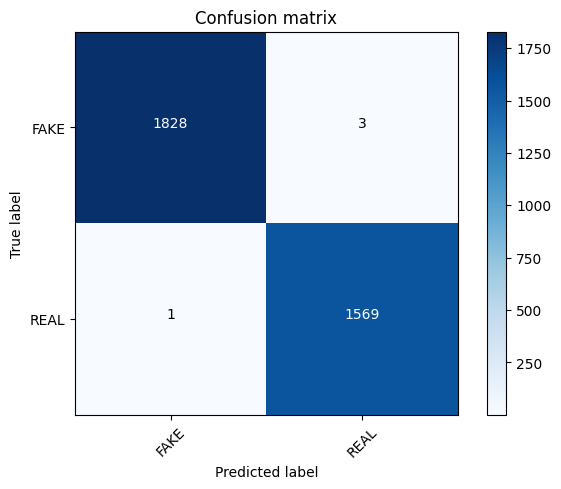

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
# Tokenization
review = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review = review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
# Vectorization
val = tfidf_v.transform([review]).toarray()
# Predict
classifier.predict(val)

array([0])

In [ ]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [ ]:
# Load model and vectorizer
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
joblib_model.predict(val_pkl)

array([0])